# Notes

1. You can either use **bestFit** to automate the steps of the process, and optionally plot the scores over the parameter grid, OR you can do each step in order [*fitModels* -> *scoreModels* -> *plotScores* -> *getBestModel*]
2. Be sure to specify ALL parameters in the ParameterGrid, even the ones you are not searching over

# Imports

Traditional imports to create our models

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier, LogisticRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, recall_score, mean_squared_error

New imports we need to run our code

In [2]:
from parFit import bestFit, fitModels, scoreModels, plotScores, getBestModel

# Classification Models

## Generating data

In [38]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_train, axis=1)])
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_val, axis=1)])

In [39]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.033673,1.863939,-0.895198
1,0.387873,-0.905592,0.033127
2,0.510656,-0.477922,0.377695
3,0.680893,-0.366116,-0.983882
4,1.946233,-2.740137,-0.018104


In [40]:
y_train[0:5]

array([1, 0, 0, 0, 1])

## Varying one parameter (LogisticRegression)

In [41]:
lr_grid = {
    'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_paramGrid = ParameterGrid(lr_grid)

In [42]:
lr_models = fitModels(LogisticRegression, lr_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0187s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [43]:
lr_scores = scoreModels(lr_models, X_val, y_val, recall_score, 'predict')

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0159s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


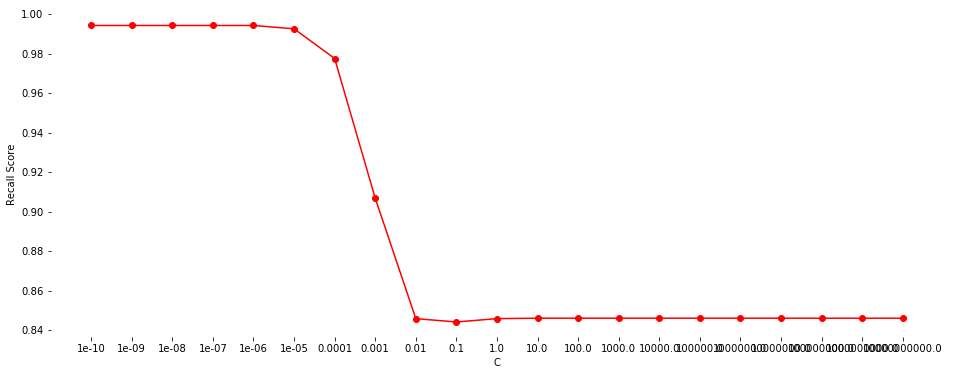

In [44]:
plotScores(lr_scores, lr_paramGrid, 'Recall Score')

In [45]:
getBestModel(lr_models, lr_scores, 'max')

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Or, in one line of code!

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0155s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0232s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remainin

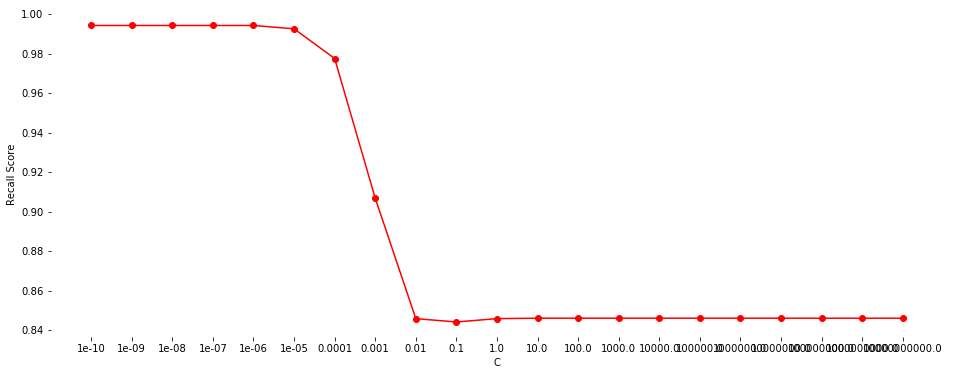

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
lr_bestModel, lr_allModels, lr_allScores = bestFit(LogisticRegression, lr_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=recall_score, bestScore='max', 
                                                   scoreLabel = 'Recall Score')
lr_bestModel

## Varying two parameters

### SGDClassifier (Logistic)

In [16]:
sgd_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'n_iter': [1e0, 1e1, 1e2, 1e3, 1e4, 1e5],
    'penalty': ['l2'],
    'loss': ['log'],
    'n_jobs': [-1]
}
sgd_paramGrid = ParameterGrid(sgd_grid)

In [31]:
sgd_models = fitModels(SGDClassifier, sgd_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0081s.) Setting batch_size=48.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of 126 | elapsed:    0.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed: 10.5min finished


In [32]:
sgd_scores = scoreModels(sgd_models, X_val, y_val, roc_auc_score)

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0315s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/ba

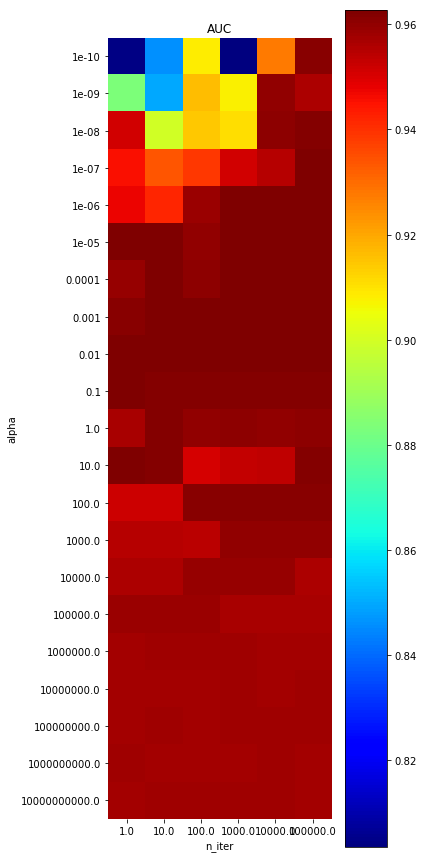

In [33]:
plotScores(sgd_scores, sgd_paramGrid, 'AUC')

In [34]:
getBestModel(sgd_models, sgd_scores, 'max')

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000.0, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

Or in one line of code!

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0090s.) Setting batch_size=44.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of 126 | elapsed:    0.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed: 10.5min finished
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.

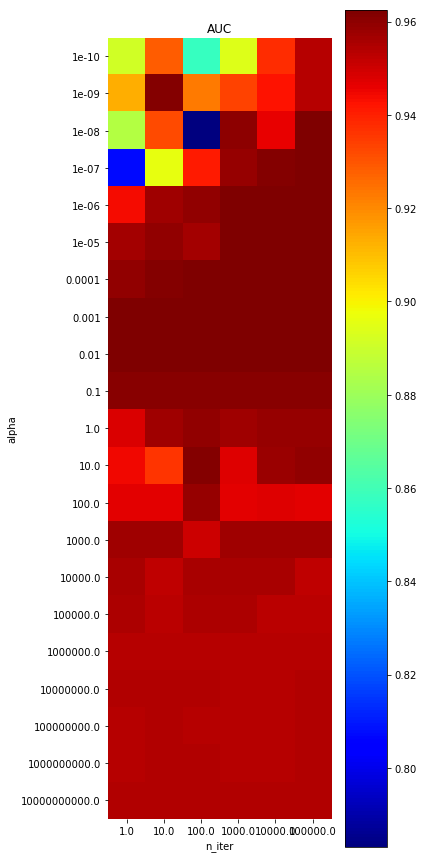

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100.0, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [17]:
sgd_bestModel, sgd_allModels, sgd_allScores = bestFit(SGDClassifier, sgd_paramGrid, 
                                                      X_train, y_train, X_val, y_val, 
                                                      metric=roc_auc_score, bestScore='max', 
                                                      scoreLabel = 'AUC')
sgd_bestModel

### RandomForestClassifier

In [47]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [48]:
rf_models = fitModels(RandomForestClassifier, rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.0s finished


In [49]:
rf_scores = scoreModels(rf_models, X_val, y_val, roc_auc_score, predictType='predict_proba')

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1460s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  45 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished


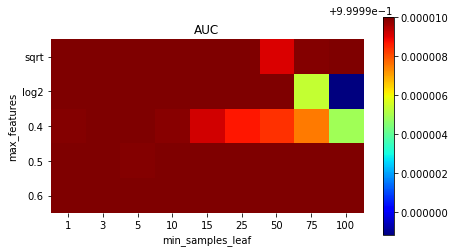

In [50]:
plotScores(rf_scores, rf_paramGrid, 'AUC')

In [51]:
getBestModel(rf_models, rf_scores, 'max')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Or in one line of code!

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1397s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  45 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.5s
[Parall

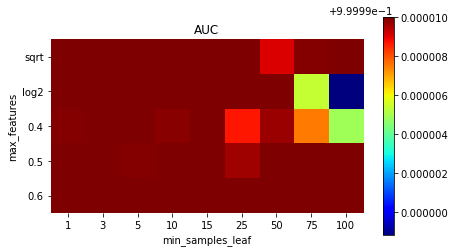

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [52]:
rf_bestModel, rf_allModels, rf_allScores = bestFit(RandomForestClassifier, rf_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=roc_auc_score, bestScore='max', 
                                                   scoreLabel = 'AUC')
rf_bestModel

# Regression Models

## Generating data

In [3]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.random.normal(0,1,10000)
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.random.normal(0,1,10000)

In [4]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.010671,0.748929,0.561407
1,0.053905,-0.150842,0.327640
2,0.418763,-0.432005,-0.687181
3,1.074096,-0.275541,0.137247
4,3.659171,0.509314,-0.173113


In [5]:
y_train[0:5]

array([-0.07463123, -0.90324866, -0.39184591,  1.63648167,  2.62168885])

## Varying one parameter (Ridge Regression)

In [6]:
ridge_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
}
ridge_paramGrid = ParameterGrid(ridge_grid)

In [7]:
ridge_models = fitModels(Ridge, ridge_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0208s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [8]:
ridge_scores = scoreModels(ridge_models, X_val, y_val, mean_squared_error)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0234s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


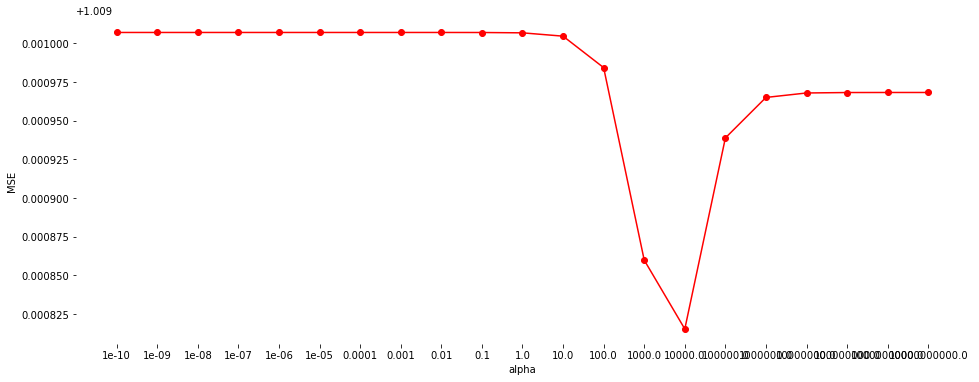

In [9]:
plotScores(ridge_scores, ridge_paramGrid, "MSE")

In [10]:
getBestModel(ridge_models, ridge_scores, 'min')

Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Or in one line of code!

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0100s.) Setting batch_size=38.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0117s.) Setting batch_size=34.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remainin

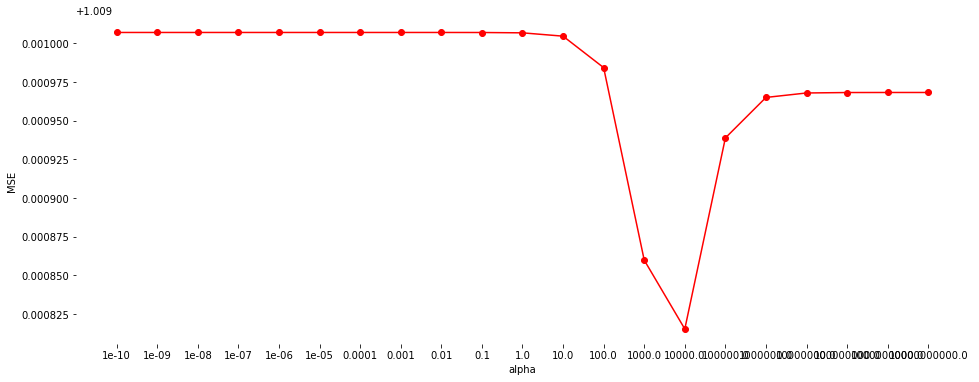

Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
ridge_bestModel, ridge_allModels, ridge_allScores = bestFit(Ridge, ridge_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, bestScore='min', 
                                                            scoreLabel = 'MSE')
ridge_bestModel

## Varying two parameters

### ElasticNet

In [12]:
en_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'l1_ratio': np.linspace(0,1,21)
}
en_paramGrid = ParameterGrid(en_grid)

In [13]:
en_models = fitModels(ElasticNet, en_paramGrid, X_train, y_train)

/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may

In [14]:
en_scores = scoreModels(en_models, X_val, y_val, mean_squared_error)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0374s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1550s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 156 out of 441 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    0.9s finished


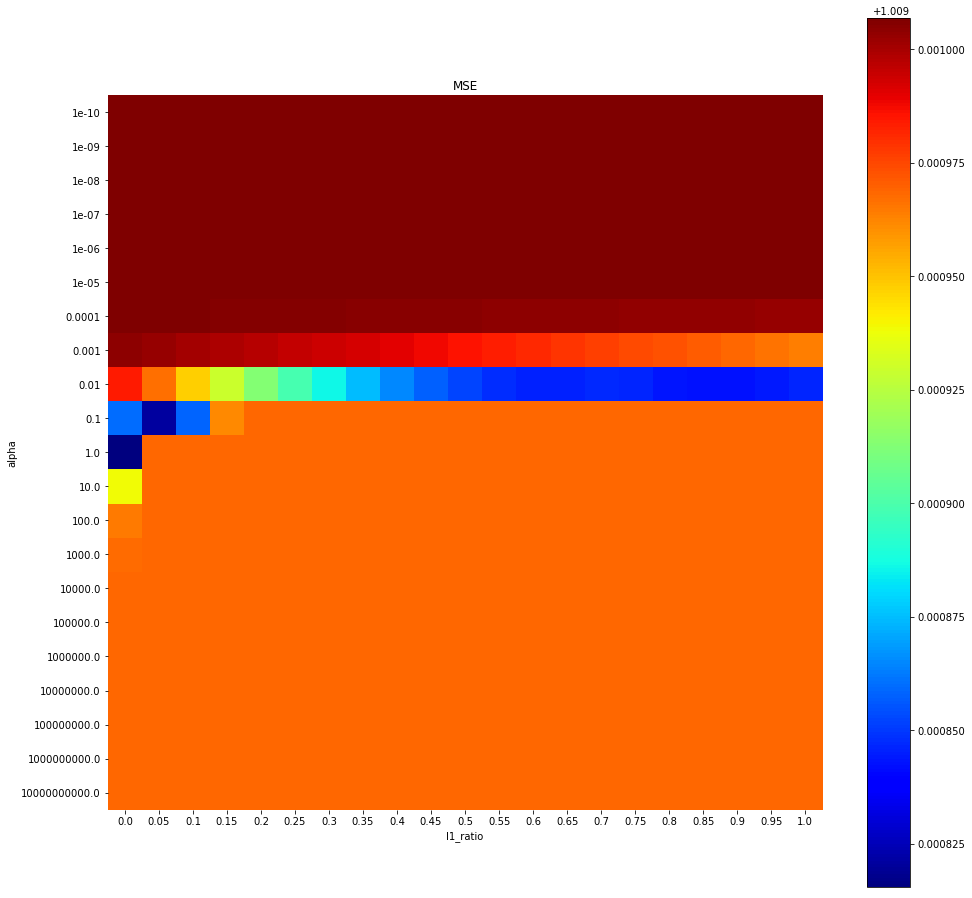

In [15]:
plotScores(en_scores, en_paramGrid, "MSE")

In [16]:
getBestModel(en_models, en_scores, 'min')

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Or in one line of code!

-------------FITTING MODELS-------------


/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/jmcarpenter/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0303s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Paral

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0136s.) Setting batch_size=28.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0854s.) Setting batch_size=130.
[Parallel(n_jobs=-1)]: Done 156 out of 441 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    0.5s finished


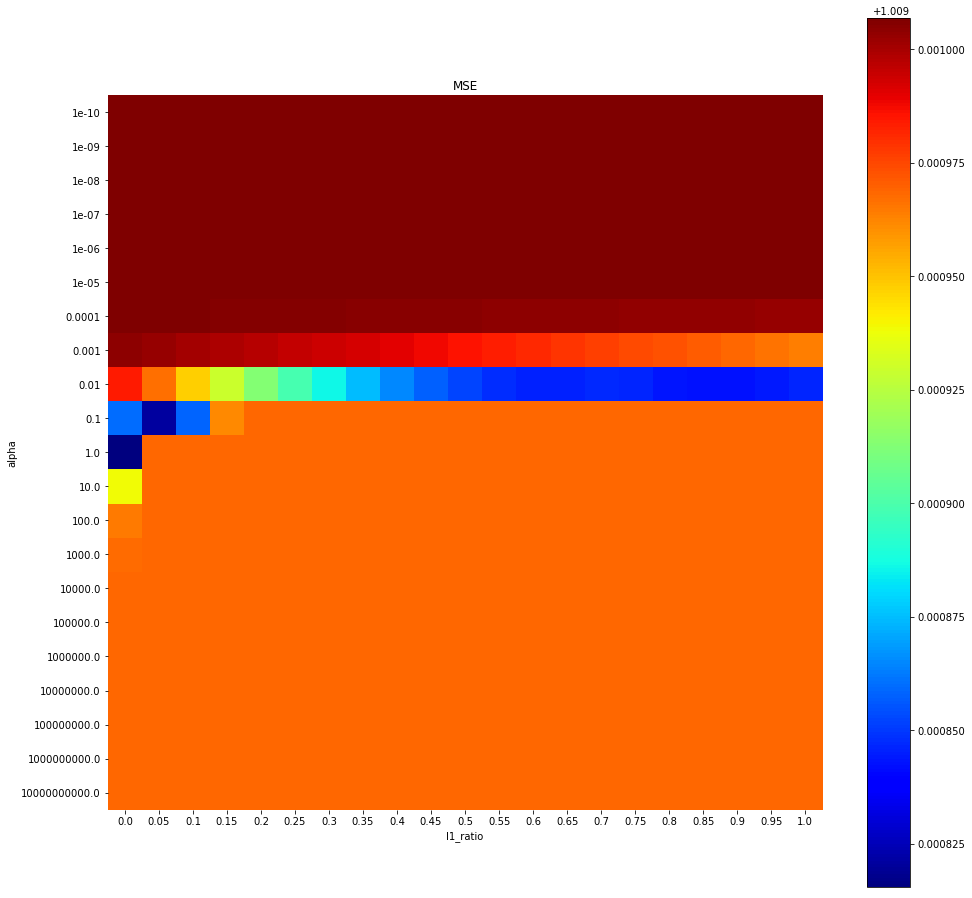

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
en_bestModel, en_allModels, en_allScores = bestFit(ElasticNet, en_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=mean_squared_error, bestScore='min',
                                                   scoreLabel = 'MSE')
en_bestModel

### RandomForestRegressor

In [18]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100,125,150,175,200,250,300,400,500],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [19]:
rfreg_models = fitModels(RandomForestRegressor, rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    8.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.4s finished


In [20]:
rfreg_scores = scoreModels(rfreg_models, X_val, y_val, mean_squared_error)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.4s finished


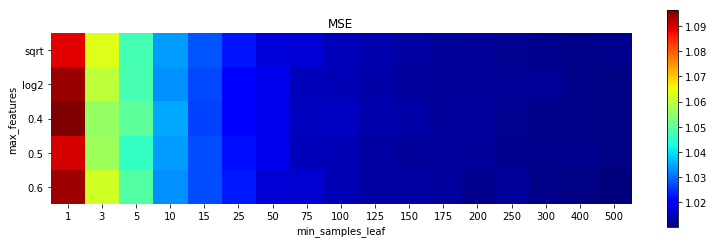

In [21]:
plotScores(rfreg_scores, rf_paramGrid, "MSE")

In [22]:
getBestModel(rfreg_models, rfreg_scores, 'min')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    8.0s remaining:    0.6s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.4s finished


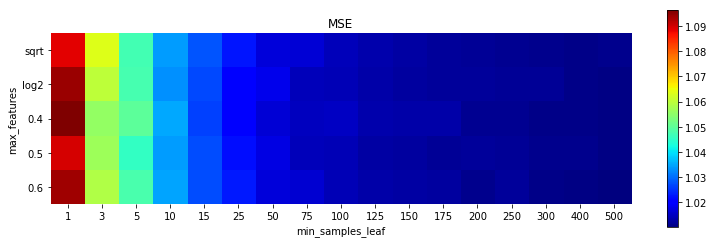

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
rfreg_bestModel, rfreg_allModels, rfreg_allScores = bestFit(RandomForestRegressor, rf_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, bestScore='min',
                                                            scoreLabel = 'MSE')
rfreg_bestModel